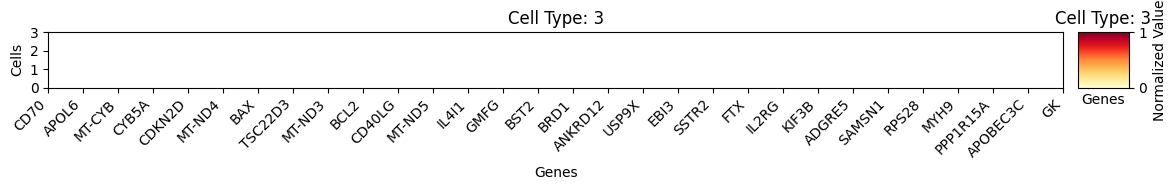

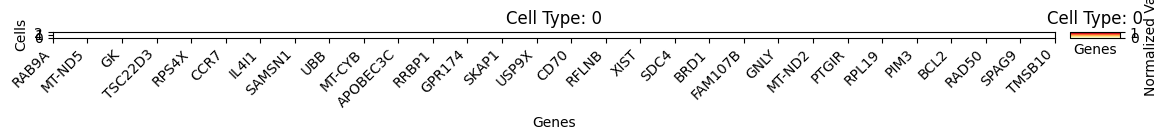

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from sklearn.preprocessing import MinMaxScaler

# 读取文件
genes = pd.read_csv('train_input_genes.csv', header=None)
labels = pd.read_csv('train_label.csv', header=None)
attention = pd.read_csv('train_attention.csv', header=None)
attention = attention.iloc[:, 1:]  # 去掉第一列

# 将数据组合在一起
attention.columns = genes.iloc[0]  # 使用基因名作为列名
attention['label'] = labels.iloc[:, 0]  # 添加标签列

# 创建MinMaxScaler实例
scaler = MinMaxScaler()

# 对每个细胞类型进行处理
for cell_type in attention['label'].unique():
    # 获取该类型的细胞数据
    cell_data = attention[attention['label'] == cell_type].drop('label', axis=1)
    
    # 计算每个基因的累计值并排序
    gene_sums = cell_data.sum()
    # 去掉'padding'并获取前25个基因
    top_genes = gene_sums[gene_sums.index != 'padding'].nlargest(30).index
    
    # 提取这些基因的数据
    plot_data = cell_data[top_genes]
    
    # 对数据进行归一化
    normalized_data = pd.DataFrame(
        scaler.fit_transform(plot_data),
        columns=plot_data.columns,
        index=plot_data.index
    )
    
    # 创建图形
#     plt.figure(figsize=(12, len(cell_data) * 0.8))
    fig = plt.figure(figsize=(12, len(cell_data) * 0.5))
    gs = fig.add_gridspec(1, 2, width_ratios=[20, 1])  # 比例20:1确保主图占据足够空间
    ax = fig.add_subplot(gs[0])
    cax = fig.add_subplot(gs[1])
    
#     # 使用seaborn的scatterplot创建圆圈热图
#     for i, row in enumerate(normalized_data.index):
#         for j, col in enumerate(normalized_data.columns):
#             value = normalized_data.iloc[i, j]
#             plt.scatter(j, i, s=value*100, c=value, 
#                        cmap='YlOrRd', alpha=0.8)
    
#     # 设置图形属性
#     plt.title(f'Cell Type: {cell_type}')
#     plt.xlabel('Genes')
#     plt.ylabel('Cells')
#     plt.xticks(range(len(top_genes)), top_genes, rotation=45, ha='right')
#     plt.yticks(range(len(cell_data)))
#     plt.colorbar(label='Normalized Value')
    
#     # 调整布局并显示
#     plt.tight_layout()
#     plt.show()
    norm = Normalize(vmin=0, vmax=1)
    
    # 使用seaborn的scatterplot创建圆圈热图
    for i, row in enumerate(normalized_data.index):
        for j, col in enumerate(normalized_data.columns):
            value = normalized_data.iloc[i, j]
            plt.scatter(j, i, s=value*500, c=[[value]], cmap='YlOrRd', 
                       norm=norm, alpha=0.8, edgecolors='black', linewidth=1)
    
    # 设置图形属性
    plt.title(f'Cell Type: {cell_type}')
    plt.xlabel('Genes')
    plt.ylabel('Cells')
    plt.xticks(range(len(top_genes)), top_genes, rotation=45, ha='right')
    plt.yticks(range(len(cell_data)))
    
    # 添加colorbar并设置范围
    sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=norm)
    sm.set_array([])
    plt.colorbar(sm, cax=cax, label='Normalized Value')
    
    # 设置图形属性
    ax.set_title(f'Cell Type: {cell_type}')
    ax.set_xlabel('Genes')
    ax.set_ylabel('Cells')
    ax.set_xticks(range(len(top_genes)))
    ax.set_xticklabels(top_genes, rotation=45, ha='right')
    ax.set_yticks(range(len(cell_data)))

    # 调整布局并显示
    plt.tight_layout()
    plt.show()


In [36]:
normalized_data

,CDC25B,EIF1AY,IFI35,RAB9A,GNG8,MIR155HG,PIM3,RPS28,MT-CYB,GTSE1,...,MT-ND2,AC005921.2,USP9X,ANKRD12,SAMSN1,PPP1R15A,RPS4Y1,CDKN2D,TPM4,CD7
4,1.000000,0.743966,0.446412,0.363140,0.534189,0.111733,0.796729,0.610362,0.601746,0.278035,...,0.371262,0.493659,0.517695,0.078096,0.371741,0.206348,0.526563,0.346002,0.199665,0.000000
5,0.391968,0.222900,0.603210,0.550555,0.748741,0.349953,0.314771,0.395758,0.507221,0.765488,...,0.512007,0.683920,0.529613,0.409135,0.884505,0.000000,0.524654,0.743999,0.497474,0.739008
6,0.467171,0.801176,0.849432,0.816406,0.268957,1.000000,0.231069,0.370246,0.301816,0.487511,...,0.402277,0.140394,0.175740,0.754087,0.096458,0.860932,0.133949,0.179385,0.502191,0.567212


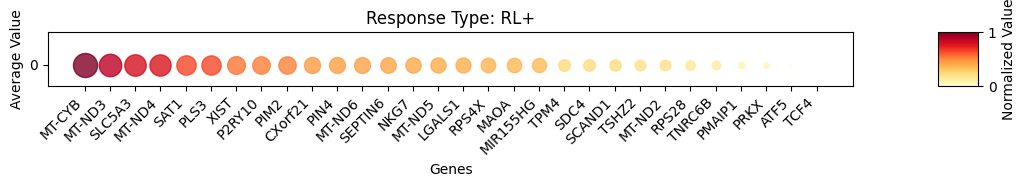

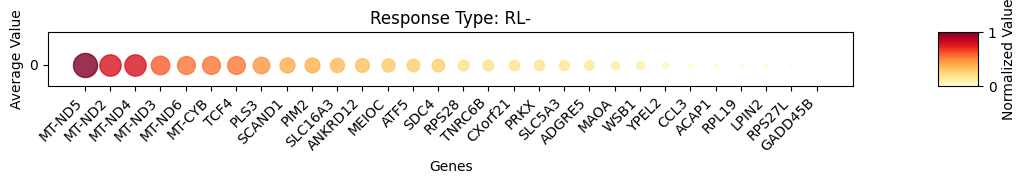

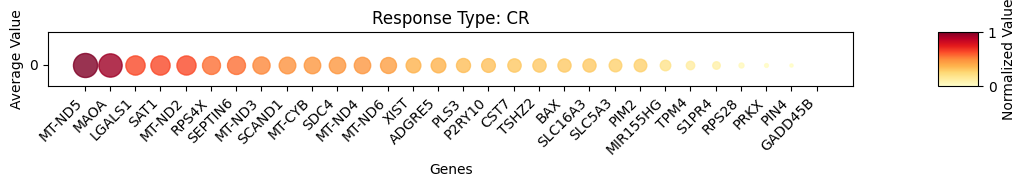

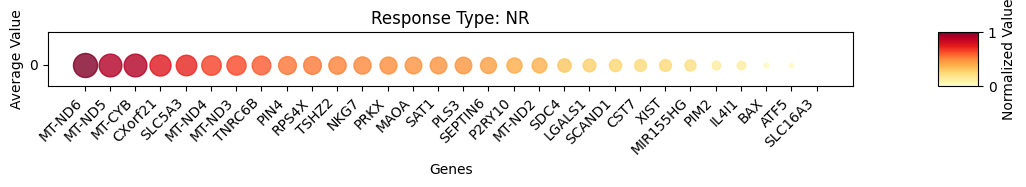

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from matplotlib.colors import Normalize


# 读取文件
genes = pd.read_csv('train_input_genes.csv', header=None)
labels = pd.read_csv('train_label.csv', header=None)
attention = pd.read_csv('train_attention.csv', header=None)
attention = attention.iloc[:, 1:]  # 去掉第一列

# 将数据组合在一起
attention.columns = genes.iloc[0]  # 使用基因名作为列名
attention['label'] = labels.iloc[:, 0]  # 添加标签列

# 创建MinMaxScaler实例
scaler = MinMaxScaler()

response = {0:'CR', 1:'NR', 2:'RL+', 3:'RL-'}

# 对每个细胞类型进行处理
for cell_type in attention['label'].unique():
    # 获取该类型的细胞数据
    cell_data = attention[attention['label'] == cell_type].drop('label', axis=1)
    
    # 计算每个基因的累计值并排序
    gene_sums = cell_data.sum()
    # 去掉'padding'并获取前25个基因
    top_genes = gene_sums[gene_sums.index != 'padding'].nlargest(30).index
    
    # 提取这些基因的数据
    plot_data = cell_data[top_genes]
    
#     average_row = plot_data.mean(axis=0).mean()
    plot_data = pd.DataFrame([plot_data.mean()], index=['Average'])

    
    
    # 对数据进行归一化
#     normalized_data = pd.DataFrame(
#         scaler.fit_transform(plot_data),
#         columns=plot_data.columns,
#         index=plot_data.index
#     )
    normalized_data = plot_data.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=1)

    # 创建图形和axes，使用gridspec来预留colorbar的空间
    fig = plt.figure(figsize=(12, 1 * 0.7))
    gs = fig.add_gridspec(1, 2, width_ratios=[20, 1])  # 比例20:1确保主图占据足够空间
    ax = fig.add_subplot(gs[0])
    cax = fig.add_subplot(gs[1])

    # 创建标准化对象
    norm = Normalize(vmin=0, vmax=1)

    # 绘制散点图
    for i, row in enumerate(normalized_data.index):
        for j, col in enumerate(normalized_data.columns):
            value = normalized_data.iloc[i, j]
            ax.scatter(j, i, s=value*300, c=[[value]], cmap='YlOrRd', 
                      norm=norm, alpha=0.8, linewidth=1)

    # 添加colorbar
    sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=norm)
    sm.set_array([])
    plt.colorbar(sm, cax=cax, label='Normalized Value')
    ax.set_ylim(-0.2, 1-0.7)

    # 设置图形属性
    ax.set_title(f'Response Type: {response[cell_type]}')
    ax.set_xlabel('Genes')
    ax.set_ylabel('Average Value')
    ax.set_xticks(range(len(top_genes)))
    ax.set_xticklabels(top_genes, rotation=45, ha='right')
    ax.set_yticks([0])

    # 调整布局并显示
#     plt.tight_layout()
    plt.show()


In [62]:
normalized_data

,MT-ND6,MT-ND5,MT-CYB,CXorf21,SLC5A3,MT-ND4,MT-ND3,TNRC6B,PIN4,RPS4X,...,LGALS1,SCAND1,CST7,XIST,MIR155HG,PIM2,IL4I1,BAX,ATF5,SLC16A3
Average,1.0,0.895848,0.894594,0.767902,0.728099,0.659534,0.637156,0.604761,0.549255,0.542711,...,0.280098,0.258886,0.24519,0.243628,0.214405,0.12834,0.123685,0.042586,0.034353,0.0


In [50]:
plot_data.mean(axis=0).mean()
# plot_data = pd.DataFrame([average_row], index=['Average'])

1.7461318929990133